In [1]:
import numpy as np
import math
import lapjv as lapjv
import matplotlib.pyplot as plt
from scipy.spatial import distance
import datetime
import pandas as pd
import statistics

In [125]:
N = 100
n = 300

r = np.sqrt(1/np.pi)

B0_x = np.random.random(n) * 2 * r - r
B0_y = np.random.random(n) * 2 * r - r
R0_x = np.random.random(n) * 2 * r - r 
R0_y = np.random.random(n) * 2 * r - r 

B_x=[]; B_y=[];R_x=[]; R_y=[]; m_r=0; m_b=0

for i in range(n):
    if (m_b < N) & (math.hypot(B0_x[i],B0_y[i]) < r):
        B_x.append(B0_x[i])
        B_y.append(B0_y[i])
        m_b+=1

for i in range(n):
    if (m_r < N) & (math.hypot(R0_x[i],R0_y[i]) < r):
        R_x.append(R0_x[i])
        R_y.append(R0_y[i])
        m_r+=1
        
B1 = np.reshape(np.concatenate((B_x,B_y),axis=0),(2,N)).T
R1 = np.reshape(np.concatenate((R_x,R_y),axis=0),(2,N)).T
dis_star_matrix=np.zeros(shape=(N,N))    
piopt,piopt_int,H_opt = lapjv.lapjv(distance.cdist(B1, R1, 'euclidean')**2)
R1_piopt=R1[piopt]

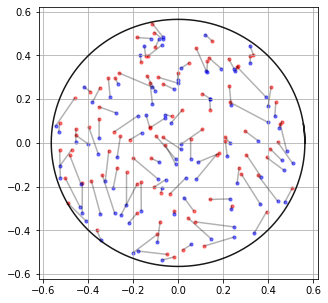

In [127]:
plt.figure(figsize=(5,5))

_t = np.arange(0,2.05,0.001)
_x = np.cos(_t*np.pi)*r
_y = np.sin(_t*np.pi)*r
plt.plot(_x,_y,'b-',color='black',alpha=0.9)
for i in range(N):
    plt.scatter(B_x[i], B_y[i], color='b',s=10,alpha=0.5)
    plt.scatter(R_x[i], R_y[i], color='r',s=10,alpha=0.5) 
    plt.plot([B1[i,0],R1_piopt[i,0]], [B1[i,1],R1_piopt[i,1]], color='black', alpha=0.3)
plt.grid(True)
plt.savefig('disk',dpi=600,bbox_inches = 'tight')

In [115]:
N = 100

B_x = np.random.random(N)
B_y = np.random.random(N)

R_x = np.random.random(N) 
R_y = np.random.random(N)

        
R1 = np.reshape(np.concatenate((R_x,R_y),axis=0),(2,N)).T
B1 = np.reshape(np.concatenate((B_x,B_y),axis=0),(2,N)).T
dis_star_matrix=np.zeros(shape=(N,N))    
piopt,piopt_int,H_opt = lapjv.lapjv(distance.cdist(R1, B1, 'euclidean')**2)
B1_piopt=B1[piopt]

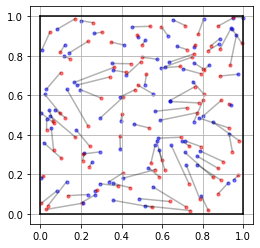

In [117]:
plt.figure(figsize=(4,4))

plt.plot([0,0], [0,1], color='black')
plt.plot([0,1], [0,0], color='black')
plt.plot([1,1], [0,1], color='black')
plt.plot([1,0], [1,1], color='black')
for i in range(N):
    plt.scatter(R_x[i], R_y[i], color='r',s=10,alpha=0.5)
    plt.scatter(B_x[i], B_y[i], color='b',s=10,alpha=0.5) 
    plt.plot([R1[i,0],B1_piopt[i,0]], [R1[i,1],B1_piopt[i,1]], color='black', alpha=0.3)
plt.grid(True)
plt.savefig('square',dpi=600,bbox_inches = 'tight')

In [110]:
height=3**0.5/3**0.25
base=height/(3**0.5)*2

m_r=0;m_b=0;      
B_x=[];B_y=[];R_x=[];R_y=[]
n=100
for i in range(n*10):
    b_x = np.random.uniform(-base,base,1)
    b_y = np.random.uniform(0,height,1)
    if (m_b < n) & (b_y < ((base/2-b_x)*np.sqrt(3)) and b_y < ((base/2+b_x)*np.sqrt(3))):
        B_x.append(b_x)
        B_y.append(b_y)
        m_b+=1

for i in range(n*10):
    r_x = np.random.uniform(-base,base,1)
    r_y = np.random.uniform(0,height,1)
    if (m_r < n) & (r_y < ((base/2-r_x)*np.sqrt(3)) and r_y < ((base/2+r_x)*np.sqrt(3))):
        R_x.append(r_x)
        R_y.append(r_y)
        m_r+=1

B = np.reshape(np.concatenate((B_x,B_y),axis=0),(2,n)).T
R = np.reshape(np.concatenate((R_x,R_y),axis=0),(2,n)).T

dis_star_matrix=np.zeros(shape=(n,n))    
piopt,piopt_int,H_opt = lapjv.lapjv(distance.cdist(R, B, 'euclidean')**2)
B_piopt=B[piopt]

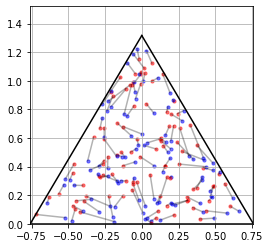

In [112]:
plt.figure(figsize=(4,4))
plt.plot([base/2,0], [0,height], color='black')
plt.plot([-base/2,0], [0,height], color='black')
plt.plot([-base/2,base/2], [0,0], color='black')
for i in range(100):
    plt.scatter(R[i][0], R[i][1], color='r',s=10,alpha=0.5)
    plt.scatter(B[i][0], B[i][1], color='b',s=10,alpha=0.5)
    plt.plot([R[i,0],B_piopt[i,0]], [R[i,1],B_piopt[i,1]], color='black', alpha=0.3)
    
plt.grid(True)
plt.ylim(0,1.52);
plt.xlim(-0.76,0.76);
plt.savefig('triangle',dpi=600,bbox_inches = 'tight')

In [2]:
v_square=[]
for i in range(100000):
    B = np.random.random(2)
    R = np.random.random(2)
    v_square.append(np.linalg.norm(B-R)) # p=1

In [3]:
v_disk=[]
r=1/np.pi
for i in range(100000):
    radii = np.random.uniform(0,r,1)
    thetas = np.random.uniform(0,2*np.pi,1)
    X = np.sqrt(radii)*np.cos(thetas)
    Y = np.sqrt(radii)*np.sin(thetas)
    B=np.array([X,Y]).T

    radii = np.random.uniform(0,r,1)
    thetas = np.random.uniform(0,2*np.pi,1)
    X = np.sqrt(radii)*np.cos(thetas)
    Y = np.sqrt(radii)*np.sin(thetas)
    R=np.array([X,Y]).T
    
    v_disk.append(np.linalg.norm(B-R)) # p=1

In [4]:
height=3**0.5/3**0.25
base=height/(3**0.5)*2

v_triangle_1=[] # equilateral triangle

m_r=0;m_b=0;
R=[];B=[];

for i in range(500000):
    B_x = np.random.uniform(-base,base,1)
    B_y = np.random.uniform(0,height,1)
    if (m_b < 100000) & (B_y < ((base/2-B_x)*np.sqrt(3)) and B_y < ((base/2+B_x)*np.sqrt(3))):
        B.append(np.array([B_x,B_y]).T)
        m_b+=1
    
for i in range(500000):
    R_x = np.random.uniform(-base,base,1)
    R_y = np.random.uniform(0,height,1)
    if (m_r < 100000) & (R_y < ((base/2-R_x)*np.sqrt(3)) and R_y < ((base/2+R_x)*np.sqrt(3))):
        R.append(np.array([R_x,R_y]).T)
        m_r+=1
        
for i in range(100000):
    v_triangle_1.append(np.linalg.norm(B[i]-R[i])) # p=1

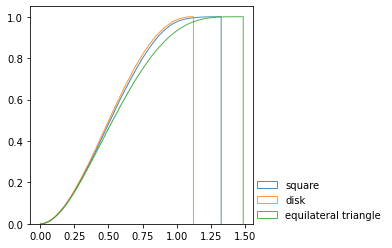

In [13]:
plt.figure(figsize=(4, 4)) 
plt.hist(v_square, bins=3000, density=True, histtype='step', cumulative=True, alpha=0.8,label="square")
plt.hist(v_disk, bins=3000, density=True, histtype='step', cumulative=True,alpha=0.8,label="disk")
plt.hist(v_triangle_1, bins=3000, density=True, histtype='step', cumulative=True, alpha=0.8,label="equilateral triangle")
plt.legend(loc=[1,0], frameon=False)
plt.savefig('2022-06-02 CDF n=1',dpi=600,bbox_inches = 'tight')

In [36]:
l_square_n100=[]; l_disk_n100=[]; l_triangle_1_n100=[]
n = 100

height=3**0.5/3**0.25
base=height/(3**0.5)*2

starttime = datetime.datetime.now()

for n_monte in range(1000):

    # ------------ square ------------ 
    B_x = np.random.random(n)
    B_y = np.random.random(n)

    R_x = np.random.random(n) 
    R_y = np.random.random(n)

    R1 = np.reshape(np.concatenate((R_x,R_y),axis=0),(2,n)).T
    B1 = np.reshape(np.concatenate((B_x,B_y),axis=0),(2,n)).T
    dis_star_matrix=np.zeros(shape=(n,n))    
    piopt,piopt_int,H_opt = lapjv.lapjv(distance.cdist(R1, B1, 'euclidean')**2)
    B1_piopt=B1[piopt]
    H_opt[0]

    for i in range(n):
        l_square_n100.append(np.linalg.norm(R1[i]-B1_piopt[i])**2)
    
    # ------------ disk ------------ 

    r=1/np.pi
    B_x=[];B_y=[];R_x=[];R_y=[]
    for i in range(n):
        radii = np.random.uniform(0,r,1)
        thetas = np.random.uniform(0,2*np.pi,1)
        B_x.append(np.sqrt(radii)*np.cos(thetas))
        B_y.append(np.sqrt(radii)*np.sin(thetas))

        radii = np.random.uniform(0,r,1)
        thetas = np.random.uniform(0,2*np.pi,1)
        R_x.append(np.sqrt(radii)*np.cos(thetas))
        R_y.append(np.sqrt(radii)*np.sin(thetas))

    B = np.reshape(np.concatenate((B_x,B_y),axis=0),(2,n)).T
    R = np.reshape(np.concatenate((R_x,R_y),axis=0),(2,n)).T

    dis_star_matrix=np.zeros(shape=(n,n))    
    piopt,piopt_int,H_opt = lapjv.lapjv(distance.cdist(R, B, 'euclidean')**2)
    B_piopt=B[piopt]
    H_opt[0]

    for i in range(n):
        l_disk_n100.append(np.linalg.norm(R[i]-B_piopt[i])**2)
        
    # ------------ triangle ------------  

    m_r=0;m_b=0;B_x=[];B_y=[];R_x=[];R_y=[]

    for i in range(n*10):
        b_x = np.random.uniform(-base,base,1)
        b_y = np.random.uniform(0,height,1)
        if (m_b < n) & (b_y < ((base/2-b_x)*np.sqrt(3)) and b_y < ((base/2+b_x)*np.sqrt(3))):
            B_x.append(b_x)
            B_y.append(b_y)
            m_b+=1

    for i in range(n*10):
        r_x = np.random.uniform(-base,base,1)
        r_y = np.random.uniform(0,height,1)
        if (m_r < n) & (r_y < ((base/2-r_x)*np.sqrt(3)) and r_y < ((base/2+r_x)*np.sqrt(3))):
            R_x.append(r_x)
            R_y.append(r_y)
            m_r+=1

    B = np.reshape(np.concatenate((B_x,B_y),axis=0),(2,n)).T
    R = np.reshape(np.concatenate((R_x,R_y),axis=0),(2,n)).T

    dis_star_matrix=np.zeros(shape=(n,n))    
    piopt,piopt_int,H_opt = lapjv.lapjv(distance.cdist(R, B, 'euclidean')**2)
    B_piopt=B[piopt]
    H_opt[0]

    for i in range(n):
        l_triangle_1_n100.append(np.linalg.norm(R[i]-B_piopt[i])**2) # p=2
        
endtime = datetime.datetime.now()
print(starttime)
print(endtime)

2022-06-02 01:31:52.168025
2022-06-02 01:33:04.427676


In [40]:
l_square_n200=[]; l_disk_n200=[]; l_triangle_1_n200=[]
n = 200

height=3**0.5/3**0.25
base=height/(3**0.5)*2

starttime = datetime.datetime.now()

for n_monte in range(1000):

    # ------------ square ------------ 
    B_x = np.random.random(n)
    B_y = np.random.random(n)

    R_x = np.random.random(n) 
    R_y = np.random.random(n)

    R1 = np.reshape(np.concatenate((R_x,R_y),axis=0),(2,n)).T
    B1 = np.reshape(np.concatenate((B_x,B_y),axis=0),(2,n)).T
    dis_star_matrix=np.zeros(shape=(n,n))    
    piopt,piopt_int,H_opt = lapjv.lapjv(distance.cdist(R1, B1, 'euclidean')**2)
    B1_piopt=B1[piopt]
    H_opt[0]

    for i in range(n):
        l_square_n200.append(np.linalg.norm(R1[i]-B1_piopt[i])**2)
    
    # ------------ disk ------------ 

    r=1/np.pi
    B_x=[];B_y=[];R_x=[];R_y=[]
    for i in range(n):
        radii = np.random.uniform(0,r,1)
        thetas = np.random.uniform(0,2*np.pi,1)
        B_x.append(np.sqrt(radii)*np.cos(thetas))
        B_y.append(np.sqrt(radii)*np.sin(thetas))

        radii = np.random.uniform(0,r,1)
        thetas = np.random.uniform(0,2*np.pi,1)
        R_x.append(np.sqrt(radii)*np.cos(thetas))
        R_y.append(np.sqrt(radii)*np.sin(thetas))

    B = np.reshape(np.concatenate((B_x,B_y),axis=0),(2,n)).T
    R = np.reshape(np.concatenate((R_x,R_y),axis=0),(2,n)).T

    dis_star_matrix=np.zeros(shape=(n,n))    
    piopt,piopt_int,H_opt = lapjv.lapjv(distance.cdist(R, B, 'euclidean')**2)
    B_piopt=B[piopt]
    H_opt[0]

    for i in range(n):
        l_disk_n200.append(np.linalg.norm(R[i]-B_piopt[i])**2)
        
    # ------------ triangle ------------  

    m_r=0;m_b=0;B_x=[];B_y=[];R_x=[];R_y=[]

    for i in range(n*10):
        b_x = np.random.uniform(-base,base,1)
        b_y = np.random.uniform(0,height,1)
        if (m_b < n) & (b_y < ((base/2-b_x)*np.sqrt(3)) and b_y < ((base/2+b_x)*np.sqrt(3))):
            B_x.append(b_x)
            B_y.append(b_y)
            m_b+=1

    for i in range(n*10):
        r_x = np.random.uniform(-base,base,1)
        r_y = np.random.uniform(0,height,1)
        if (m_r < n) & (r_y < ((base/2-r_x)*np.sqrt(3)) and r_y < ((base/2+r_x)*np.sqrt(3))):
            R_x.append(r_x)
            R_y.append(r_y)
            m_r+=1

    B = np.reshape(np.concatenate((B_x,B_y),axis=0),(2,n)).T
    R = np.reshape(np.concatenate((R_x,R_y),axis=0),(2,n)).T

    dis_star_matrix=np.zeros(shape=(n,n))    
    piopt,piopt_int,H_opt = lapjv.lapjv(distance.cdist(R, B, 'euclidean')**2)
    B_piopt=B[piopt]
    H_opt[0]

    for i in range(n):
        l_triangle_1_n200.append(np.linalg.norm(R[i]-B_piopt[i])**2) # p=2
        
endtime = datetime.datetime.now()
print(starttime)
print(endtime)

2022-06-02 01:33:19.912178
2022-06-02 01:36:30.129772


In [45]:
l_square_n400=[]; l_disk_n400=[]; l_triangle_1_n400=[]
n = 400

height=3**0.5/3**0.25
base=height/(3**0.5)*2

starttime = datetime.datetime.now()

for n_monte in range(1000):

    # ------------ square ------------ 
    B_x = np.random.random(n)
    B_y = np.random.random(n)

    R_x = np.random.random(n) 
    R_y = np.random.random(n)

    R1 = np.reshape(np.concatenate((R_x,R_y),axis=0),(2,n)).T
    B1 = np.reshape(np.concatenate((B_x,B_y),axis=0),(2,n)).T
    dis_star_matrix=np.zeros(shape=(n,n))    
    piopt,piopt_int,H_opt = lapjv.lapjv(distance.cdist(R1, B1, 'euclidean')**2)
    B1_piopt=B1[piopt]
    H_opt[0]

    for i in range(n):
        l_square_n400.append(np.linalg.norm(R1[i]-B1_piopt[i])**2)
    
    # ------------ disk ------------ 

    r=1/np.pi
    B_x=[];B_y=[];R_x=[];R_y=[]
    for i in range(n):
        radii = np.random.uniform(0,r,1)
        thetas = np.random.uniform(0,2*np.pi,1)
        B_x.append(np.sqrt(radii)*np.cos(thetas))
        B_y.append(np.sqrt(radii)*np.sin(thetas))

        radii = np.random.uniform(0,r,1)
        thetas = np.random.uniform(0,2*np.pi,1)
        R_x.append(np.sqrt(radii)*np.cos(thetas))
        R_y.append(np.sqrt(radii)*np.sin(thetas))

    B = np.reshape(np.concatenate((B_x,B_y),axis=0),(2,n)).T
    R = np.reshape(np.concatenate((R_x,R_y),axis=0),(2,n)).T

    dis_star_matrix=np.zeros(shape=(n,n))    
    piopt,piopt_int,H_opt = lapjv.lapjv(distance.cdist(R, B, 'euclidean')**2)
    B_piopt=B[piopt]
    H_opt[0]

    for i in range(n):
        l_disk_n400.append(np.linalg.norm(R[i]-B_piopt[i])**2)
        
    # ------------ triangle ------------  

    m_r=0;m_b=0;B_x=[];B_y=[];R_x=[];R_y=[]

    for i in range(n*10):
        b_x = np.random.uniform(-base,base,1)
        b_y = np.random.uniform(0,height,1)
        if (m_b < n) & (b_y < ((base/2-b_x)*np.sqrt(3)) and b_y < ((base/2+b_x)*np.sqrt(3))):
            B_x.append(b_x)
            B_y.append(b_y)
            m_b+=1

    for i in range(n*10):
        r_x = np.random.uniform(-base,base,1)
        r_y = np.random.uniform(0,height,1)
        if (m_r < n) & (r_y < ((base/2-r_x)*np.sqrt(3)) and r_y < ((base/2+r_x)*np.sqrt(3))):
            R_x.append(r_x)
            R_y.append(r_y)
            m_r+=1

    B = np.reshape(np.concatenate((B_x,B_y),axis=0),(2,n)).T
    R = np.reshape(np.concatenate((R_x,R_y),axis=0),(2,n)).T

    dis_star_matrix=np.zeros(shape=(n,n))    
    piopt,piopt_int,H_opt = lapjv.lapjv(distance.cdist(R, B, 'euclidean')**2)
    B_piopt=B[piopt]
    H_opt[0]

    for i in range(n):
        l_triangle_1_n400.append(np.linalg.norm(R[i]-B_piopt[i])**2) # p=2
        
endtime = datetime.datetime.now()
print(starttime)
print(endtime)

l_square_n800=[]; l_disk_n800=[]; l_triangle_1_n800=[]
n = 800

height=3**0.5/3**0.25
base=height/(3**0.5)*2

starttime = datetime.datetime.now()

for n_monte in range(1000):

    # ------------ square ------------ 
    B_x = np.random.random(n)
    B_y = np.random.random(n)

    R_x = np.random.random(n) 
    R_y = np.random.random(n)

    R1 = np.reshape(np.concatenate((R_x,R_y),axis=0),(2,n)).T
    B1 = np.reshape(np.concatenate((B_x,B_y),axis=0),(2,n)).T
    dis_star_matrix=np.zeros(shape=(n,n))    
    piopt,piopt_int,H_opt = lapjv.lapjv(distance.cdist(R1, B1, 'euclidean')**2)
    B1_piopt=B1[piopt]
    H_opt[0]

    for i in range(n):
        l_square_n800.append(np.linalg.norm(R1[i]-B1_piopt[i])**2)
    
    # ------------ disk ------------ 

    r=1/np.pi
    B_x=[];B_y=[];R_x=[];R_y=[]
    for i in range(n):
        radii = np.random.uniform(0,r,1)
        thetas = np.random.uniform(0,2*np.pi,1)
        B_x.append(np.sqrt(radii)*np.cos(thetas))
        B_y.append(np.sqrt(radii)*np.sin(thetas))

        radii = np.random.uniform(0,r,1)
        thetas = np.random.uniform(0,2*np.pi,1)
        R_x.append(np.sqrt(radii)*np.cos(thetas))
        R_y.append(np.sqrt(radii)*np.sin(thetas))

    B = np.reshape(np.concatenate((B_x,B_y),axis=0),(2,n)).T
    R = np.reshape(np.concatenate((R_x,R_y),axis=0),(2,n)).T

    dis_star_matrix=np.zeros(shape=(n,n))    
    piopt,piopt_int,H_opt = lapjv.lapjv(distance.cdist(R, B, 'euclidean')**2)
    B_piopt=B[piopt]
    H_opt[0]

    for i in range(n):
        l_disk_n800.append(np.linalg.norm(R[i]-B_piopt[i])**2)
        
    # ------------ triangle ------------  

    m_r=0;m_b=0;B_x=[];B_y=[];R_x=[];R_y=[]

    for i in range(n*10):
        b_x = np.random.uniform(-base,base,1)
        b_y = np.random.uniform(0,height,1)
        if (m_b < n) & (b_y < ((base/2-b_x)*np.sqrt(3)) and b_y < ((base/2+b_x)*np.sqrt(3))):
            B_x.append(b_x)
            B_y.append(b_y)
            m_b+=1

    for i in range(n*10):
        r_x = np.random.uniform(-base,base,1)
        r_y = np.random.uniform(0,height,1)
        if (m_r < n) & (r_y < ((base/2-r_x)*np.sqrt(3)) and r_y < ((base/2+r_x)*np.sqrt(3))):
            R_x.append(r_x)
            R_y.append(r_y)
            m_r+=1

    B = np.reshape(np.concatenate((B_x,B_y),axis=0),(2,n)).T
    R = np.reshape(np.concatenate((R_x,R_y),axis=0),(2,n)).T

    dis_star_matrix=np.zeros(shape=(n,n))    
    piopt,piopt_int,H_opt = lapjv.lapjv(distance.cdist(R, B, 'euclidean')**2)
    B_piopt=B[piopt]
    H_opt[0]

    for i in range(n):
        l_triangle_1_n800.append(np.linalg.norm(R[i]-B_piopt[i])**2) # p=2
        
endtime = datetime.datetime.now()
print(starttime)
print(endtime)

2022-06-02 01:37:04.290247
2022-06-02 01:46:04.157987
2022-06-02 01:46:04.160035
2022-06-02 02:17:10.543257


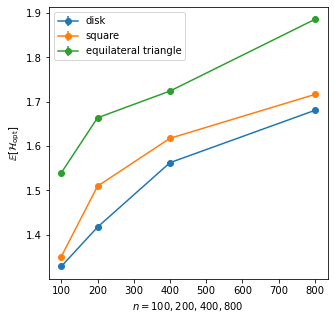

In [128]:
disk_errors=[statistics.stdev(l_disk_n100)/np.sqrt(1000),statistics.stdev(l_disk_n200)/np.sqrt(1000),
             statistics.stdev(l_disk_n400)/np.sqrt(1000),statistics.stdev(l_disk_n800)/np.sqrt(1000)]
square_errors=[statistics.stdev(l_square_n100)/np.sqrt(1000),statistics.stdev(l_square_n200)/np.sqrt(1000),
             statistics.stdev(l_square_n400)/np.sqrt(1000),statistics.stdev(l_square_n800)/np.sqrt(1000)]
triangle_errors=[statistics.stdev(l_triangle_1_n100)/np.sqrt(1000),statistics.stdev(l_triangle_1_n200)/np.sqrt(1000),
             statistics.stdev(l_triangle_1_n400)/np.sqrt(1000),statistics.stdev(l_triangle_1_n800)/np.sqrt(1000)]

plt.figure(figsize=(5,5))
plt.errorbar([100,200,400,800],
             [sum(l_disk_n100)/1000,sum(l_disk_n200)/1000,sum(l_disk_n400)/1000,sum(l_disk_n800)/1000],
             yerr=disk_errors,fmt="o-",label='disk')
plt.errorbar([100,200,400,800],
             [sum(l_square_n100)/1000,sum(l_square_n200)/1000,sum(l_square_n400)/1000,sum(l_square_n800)/1000],
             yerr=square_errors,fmt="o-",label='square')
plt.errorbar([100,200,400,800],
             [sum(l_triangle_1_n100)/1000,sum(l_triangle_1_n200)/1000,sum(l_triangle_1_n400)/1000,sum(l_triangle_1_n800)/1000],
             yerr=triangle_errors,fmt="o-",label='equilateral triangle')
plt.legend(loc='best')
plt.xlabel(r'$n=100,200,400,800$');
plt.ylabel(r'$\mathbb{E}\left[\mathcal{H}_{\rm opt}\right]$');
plt.savefig('2022-06-02 hopt',dpi=600,bbox_inches = 'tight') #n=100,200,400,800; n_monte=1000